# Exploratory Data Analysis (EDA) on California House Price Dataset

### About

The California House Price dataset contains information about housing prices and various
factors influencing them. The dataset consists of:
● Median House Value (Target Variable)
● Longitude & Latitude (Location)
● Housing Median Age
● Total Rooms & Total Bedrooms
● Population & Households
● Median Income
● Ocean Proximity (Categorical Feature)

### Objectives

* Identify features that have a strong impact on house prices 


## Importing libraries

In [35]:
#importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [36]:
# Setting theme for charts

plt.style.use('ggplot')

## 1. Data Wrangling

Loading the data -

In [37]:
data=pd.read_csv('housing.csv')
# Displaying the first 5 rows of the dataset
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### 1.1 Inspecting data

In [38]:
# Checking shape of the data
data.shape

(20640, 10)

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [40]:
data.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

##  Data Cleaning & Preprocessing

In [41]:
# Checking for duplicate rows
data.duplicated().sum()


np.int64(0)

no duplicate values present

 Check for missing values


In [42]:
missing_values=data.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

207 missing values in total bedrooms column

In [43]:
# Percentage of missing values in the 'total_bedrooms' column
missing_percentage = (data['total_bedrooms'].isnull().sum() / len(data)) * 100
print(f"Percentage of missing values in 'total_bedrooms': {missing_percentage:.2f}%")

Percentage of missing values in 'total_bedrooms': 1.00%


In [44]:
# handling missing values by mean imputation
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)



In [45]:
import warnings 
warnings.filterwarnings('ignore')

checking how many numeric columns are present and how many non-numeric columns

In [46]:
numerical_cols = data.select_dtypes(include='number')
print("Number of numerical columns:", len(numerical_cols.columns))
print("Numerical columns:", numerical_cols.columns.tolist())

categorical_cols = data.select_dtypes(exclude='number')
print("Number of categorical columns:", len(categorical_cols.columns))
print("Non-numerical columns:", categorical_cols.columns.tolist())


Number of numerical columns: 9
Numerical columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Number of categorical columns: 1
Non-numerical columns: ['ocean_proximity']


In [47]:
# Checking for unique values in 'ocean proximity' column
unique_ocean_proximity = data['ocean_proximity'].unique()
print("Unique values in 'ocean_proximity':", unique_ocean_proximity)
value=data['ocean_proximity'].value_counts()
print("Value counts for 'ocean_proximity':",value)




Unique values in 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
Value counts for 'ocean_proximity': ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


converting categorical values to numeric

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ocean_proximity_encoded'] = le.fit_transform(data['ocean_proximity'])
print(le.classes_)
#data.drop('ocean_proximity', axis=1, inplace=True)
data.head()






['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_encoded  
0                        3  
1                        3  
2                        3  
3                        3  
4                        3

label assigned

  '<1H OCEAN': 0,
  'INLAND': 1,
  'ISLAND': 2,
  'NEAR BAY': 3,
  'NEAR OCEAN': 4




summary statistics

In [49]:
data.describe().T

count           mean            std         min  \
longitude                20640.0    -119.569704       2.003532   -124.3500   
latitude                 20640.0      35.631861       2.135952     32.5400   
housing_median_age       20640.0      28.639486      12.585558      1.0000   
total_rooms              20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms           20640.0     537.870553     419.266592      1.0000   
population               20640.0    1425.476744    1132.462122      3.0000   
households               20640.0     499.539680     382.329753      1.0000   
median_income            20640.0       3.870671       1.899822      0.4999   
median_house_value       20640.0  206855.816909  115395.615874  14999.0000   
ocean_proximity_encoded  20640.0       1.165843       1.420662      0.0000   

                                 25%          50%           75%          max  
longitude                  -121.8000    -118.4900    -118.01000    -114.3100  
latitude                     33.9300      34.2600      37.71000      41.9500  
housing_median_age           18.0000      29.0000      37.00000      52.0000  
total_rooms                1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms              297.0000     438.0000     643.25000    6445.0000  
population                  787.0000    1166.0000    1725.00000   35682.0000  
households                  280.0000     409.0000     605.00000    6082.0000  
median_income                 2.5634       3.5348       4.74325      15.0001  
median_house_value       119600.0000  179700.0000  264725.00000  500001.0000  
ocean_proximity_encoded       0.0000       1.0000       1.00000       4.0000

Distribution Analysis

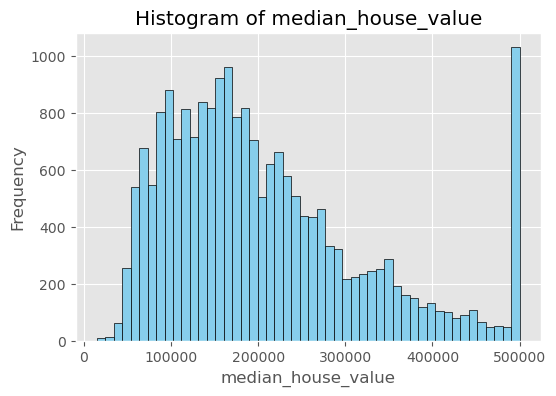

np.float64(0.9777632739098341)

In [50]:
plt.figure(figsize=(6,4))
plt.hist(data['median_house_value'], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Histogram of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
data['median_house_value'].skew()


median house value are right skewed

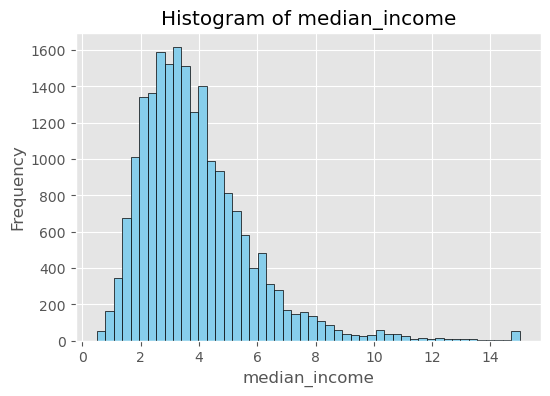

np.float64(1.6466567021344465)

In [51]:
plt.figure(figsize=(6,4))
plt.hist(data['median_income'], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Histogram of median_income')
plt.xlabel('median_income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
data['median_income'].skew()

median income is highly right-skewed

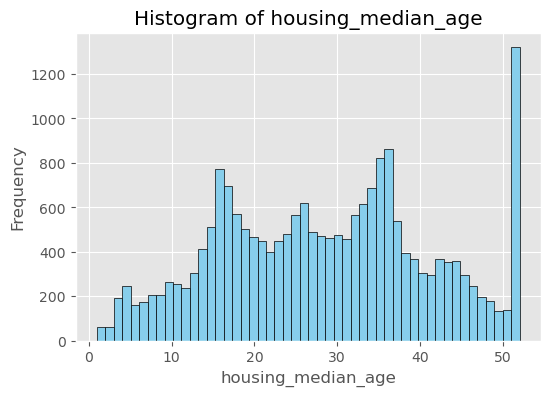

np.float64(0.060330637599136865)

In [52]:
plt.figure(figsize=(6,4))
plt.hist(data['housing_median_age'], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Histogram of housing_median_age')
plt.xlabel('housing_median_age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
data['housing_median_age'].skew()

houseing median age distribution is approximately symmetric

Correlation Analysis

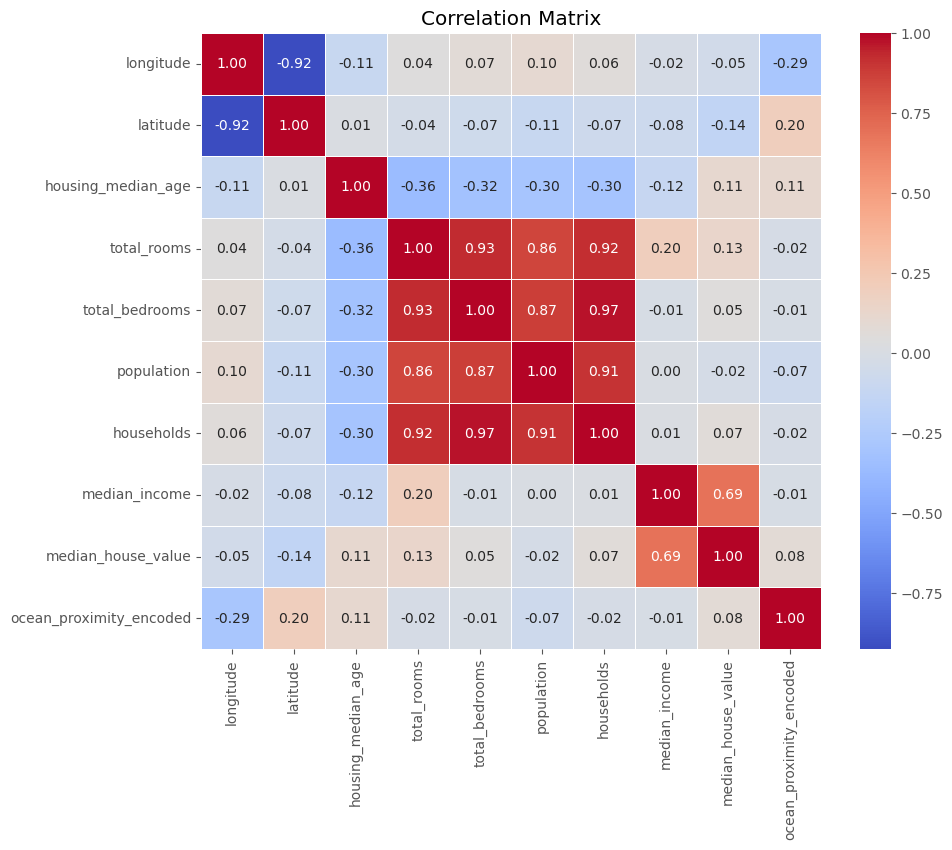

In [53]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [54]:
# Finding the strongest positive correlation with median house value
correlation_matrix['median_house_value'].sort_values(ascending=False)


median_house_value         1.000000
median_income              0.688075
total_rooms                0.134153
housing_median_age         0.105623
ocean_proximity_encoded    0.081750
households                 0.065843
total_bedrooms             0.049454
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
Name: median_house_value, dtype: float64

Median income has the strongest positive correlation with house prices (~0.68)
People who earn more tend to live in pricier houses

Geospatial Analysis

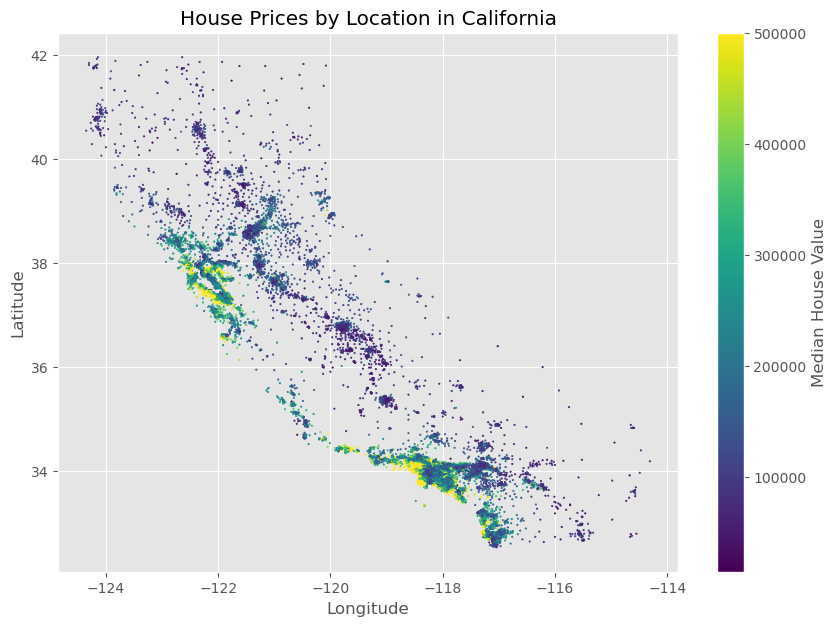

In [55]:


plt.figure(figsize=(10, 7))
plt.scatter(data['longitude'], data['latitude'], 
            c=data['median_house_value'], cmap='viridis', s=1)

plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location in California')
plt.grid(True)
plt.show()


In [56]:
import plotly.express as px

fig = px.scatter_mapbox(data, 
                        lat="latitude", 
                        lon="longitude", 
                        color="median_house_value",
                        color_continuous_scale="viridis",
                        size_max=5,
                        zoom=5,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="California Housing Prices on Map")
fig.show()


Coastal areas (like near LA, SF) tend to have higher house prices

Inland or less populated areas show lower prices

Feature Relationships

In [57]:
import plotly.express as px

fig = px.scatter(data, 
                 x='median_income', 
                 y='median_house_value', 
                 color='median_income',
                 color_continuous_scale='viridis',
                 title='Median Income vs. Median House Value',
                 labels={
                     'median_income': 'Median Income ($)',
                     'median_house_value': 'House Price ($)'
                 })

fig.update_traces(marker=dict(size=5, opacity=0.6,
                              line=dict(width=0.5, color='white')))

fig.update_layout(title_font_size=20, height=600)
fig.show()


There is a positive correlation — as income increases, house prices also increase

In [ ]:
import plotly.express as px

fig = px.box(data, 
             x='ocean_proximity', 
             y='median_house_value', 
             color='ocean_proximity',
             title='House Prices by Ocean Proximity Category',
             labels={
                 'ocean_proximity': 'Ocean Proximity',
                 'median_house_value': 'House Price ($)'
             })

fig.update_traces(quartilemethod="inclusive")  
fig.update_layout(showlegend=False, title_font_size=20, height=600)
fig.show()


NEAR OCEAN & NEAR BAY → higher house prices

INLAND → more affordable homes 

<1H OCEAN → high and wide range

ISLAND → not many houses

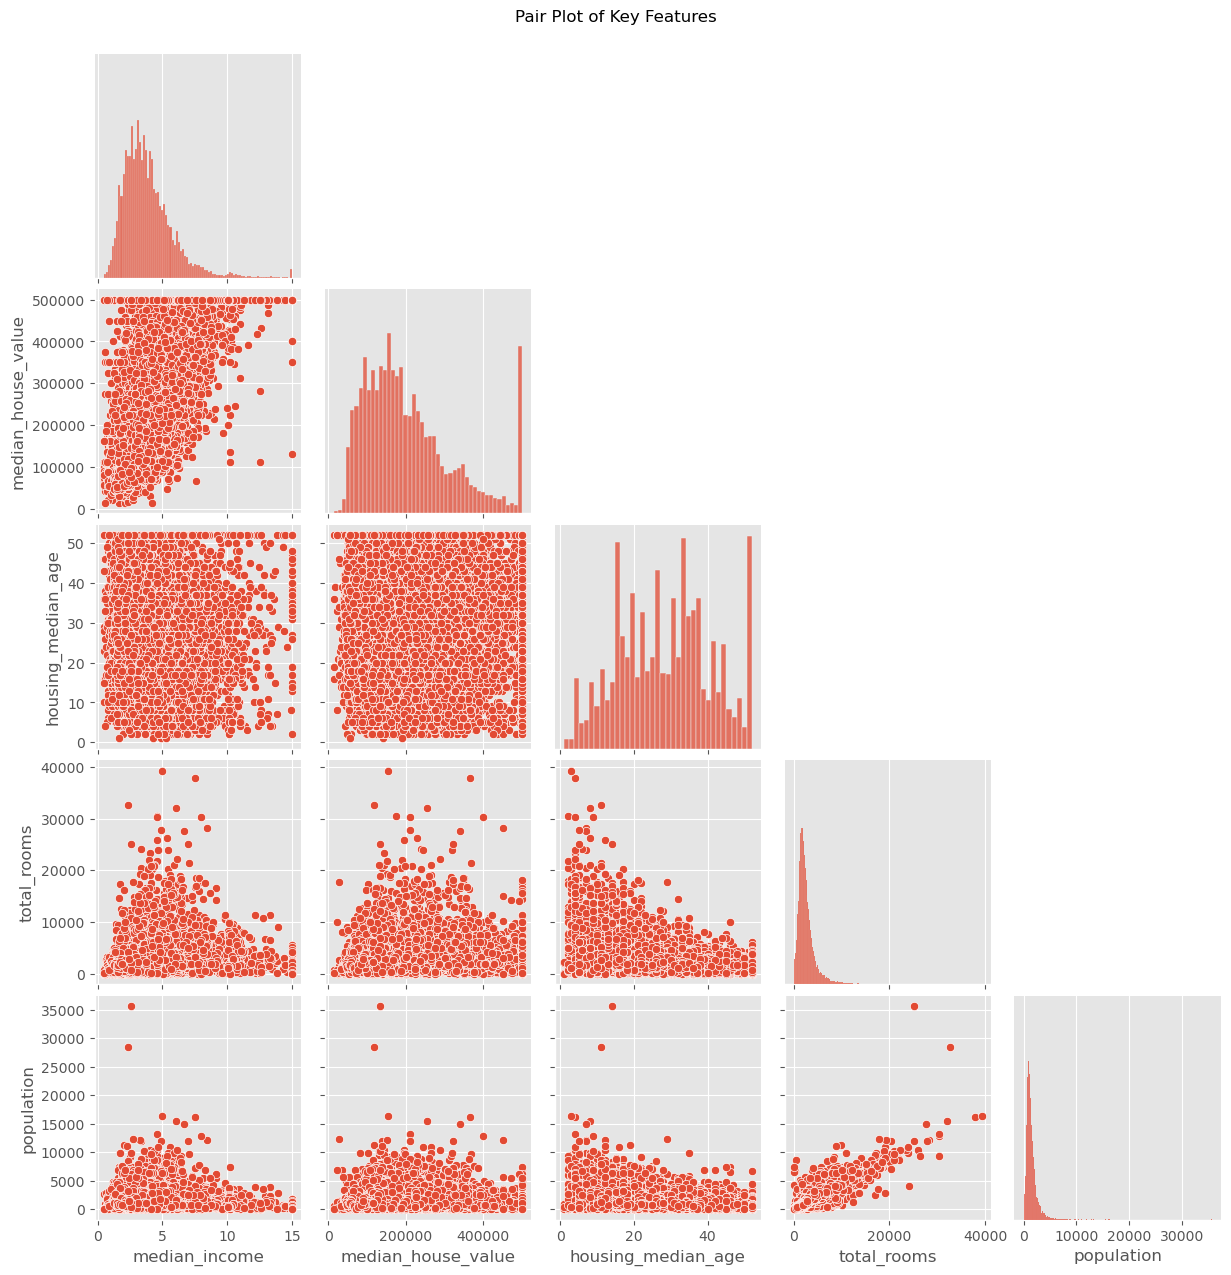

In [59]:

key_features = ['median_income', 'median_house_value', 'housing_median_age', 'total_rooms', 'population']

#  pair plot
sns.pairplot(data[key_features], corner=True)
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


 Strong positive relationship between median income and  median house value


Positive relation between total rooms and  median house value 

In [60]:

data['price_range'] = pd.cut(data['median_house_value'],
                           bins=[0, 150000, 300000, 450000, 600000],
                           labels=['Low', 'Mid', 'High', 'Very High'])

fig = px.violin(data, 
                x='price_range', 
                y='median_income', 
                box=True, 
                color='price_range', 
                title='Income Distribution Across House Price Ranges')

fig.update_layout(showlegend=False)
fig.show()


 Richer areas have higher-priced homes

In [61]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
fig = px.scatter(data, 
                 x='rooms_per_household', 
                 y='median_house_value',
                 title='Rooms per Household vs House Price',
                 trendline='ols')

fig.show()


Insight- If there are more rooms per household then the house have higher price which means bigger houses which means more money